In [20]:
#import packages
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
#from tensorflow.keras.models import leaky_relu

In [21]:
#load the data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [22]:
x_train.shape #check the shape

(60000, 28, 28)

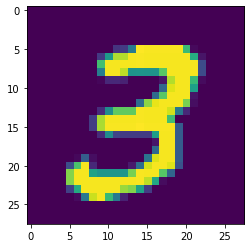

In [23]:
#plotting the image 
plt.imshow(x_train[7])
plt.show()

In [24]:
#checking the shape of y_train
y_train.shape

(60000,)

In [25]:
x_train[50]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  56, 140,
        126, 175, 200,  96,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35, 166, 238, 254, 246,
        242, 253, 246, 254,  67,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [26]:
# flattening of our matrix to a vector of input_shape 784
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])

In [27]:
#flattening of our test_data
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [28]:
x_train.shape

(60000, 784)

In [29]:
y_train[5]


2

In [30]:
#converting it into a one-hot encoding form
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [31]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
#normalization of the x_train and x_test : Now to pixel intensity values will change from 0-255 to 0-1
x_train = x_train/255
x_test = x_test/255

In [33]:
#defining the type of model
model = Sequential()

In [34]:
#building the model
model.add(Dense(64,activation='relu',input_shape = (784,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [35]:
#getting the summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [36]:
#compile the model by giving the loss function and the type of optimizer you need
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])


In [37]:

#train the data
history = model.fit(x_train,y_train,batch_size = 200, epochs = 10)


Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 0.8976 - accuracy: 0.7368
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2117 - accuracy: 0.9384
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1566 - accuracy: 0.9547
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1246 - accuracy: 0.9639
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1053 - accuracy: 0.9693
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0921 - accuracy: 0.9729
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0779 - accuracy: 0.9770
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0699 - accuracy: 0.9808
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0617 - accuracy: 0.9820
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0560 - accuracy: 0.9836

In [38]:
model.evaluate(x_test,y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.0922 - accuracy: 0.9726


[0.09224550426006317, 0.972599983215332]

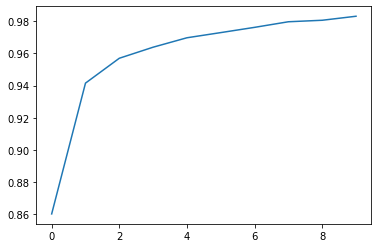

In [39]:
plt.plot(history.history['accuracy'])

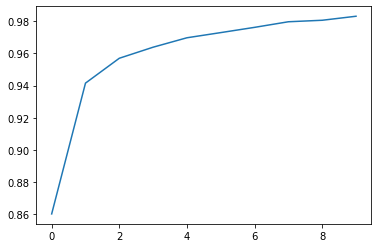

In [40]:
plt.plot(history.history['accuracy'])